**MODEL REGRESI SEDERHANA**

In [82]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [83]:
# memanggil data set lewat gdrive
path = '/content/gdrive/MyDrive/praktikum_ml/praktikum03'

In [84]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/praktikum_ml/praktikum03/data/socr.csv')
df.head()

,Index,Height(Inches),Weight(Pounds)
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971


In [85]:
# @title
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Index           25000 non-null  int64  
 1   Height(Inches)  25000 non-null  float64
 2   Weight(Pounds)  25000 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 586.1 KB


In [86]:
df.describe()

,Index,Height(Inches),Weight(Pounds)
count,25000.000000,25000.000000,25000.000000
mean,12500.500000,67.993114,127.079421
std,7217.022701,1.901679,11.660898
min,1.000000,60.278360,78.014760
25%,6250.750000,66.704397,119.308675
50%,12500.500000,67.995700,127.157750
75%,18750.250000,69.272958,134.892850
max,25000.000000,75.152800,170.924000


In [87]:
df1 = (
    df[["Height(Inches)", "Weight(Pounds)"]]
    .rename(columns={"Height(Inches)": "tinggi_cm",
                     "Weight(Pounds)": "berat_kg"})

    .assign(tinggi_cm=lambda d: d["tinggi_cm"] * 2.54,
            berat_kg=lambda d: d["berat_kg"] * 0.453592
)
.round({"tinggi_cm": 2, "berat_kg": 2})
).copy()

df1.head()

,tinggi_cm,berat_kg
0,167.09,51.25
1,181.65,61.91
2,176.27,69.41
3,173.27,64.56
4,172.18,65.45


In [88]:
from sklearn.model_selection import train_test_split
x = df1[["tinggi_cm"]]
y = df1[["berat_kg"]]
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=7
    )

In [89]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [90]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

y_pred = model.predict(x_test)
r2 = r2_score(y_test, y_pred)

print("Koefisien (kg per cm):", model.coef_[0])
print("Intersep (kg):        ", model.intercept_)
print("R2 (test):            ", r2)
print("MAE (kg):             ", mean_absolute_error(y_test, y_pred))

mse = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

Koefisien (kg per cm): [0.5518218]
Intersep (kg):         [-37.65688233]
R2 (test):             0.24989238901493693
MAE (kg):              3.6704108331736673


In [91]:
slope = model.coef_[0][0]
intercept = model.intercept_[0]
print(f"Persamaan: y ={slope:.3f} * X + {intercept:.3f}")

Persamaan: y =0.552 * X + -37.657


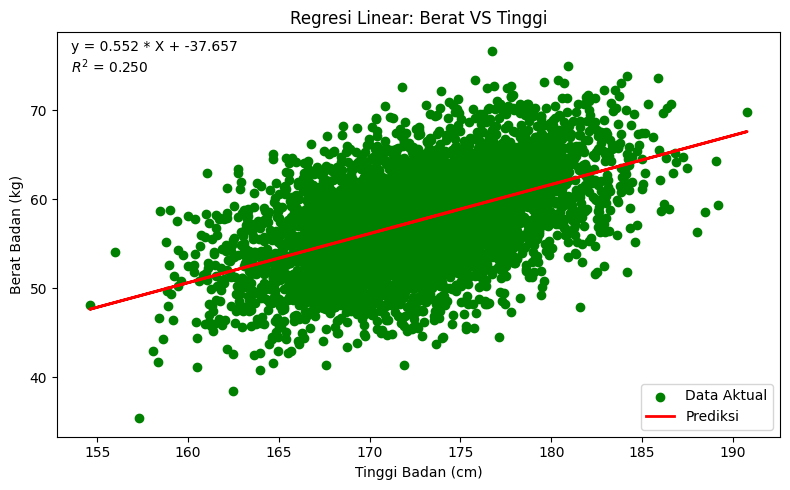

In [92]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.scatter(x_test, y_test, color="green", label="Data Aktual")

plt.plot(x_test, y_pred, color="red", linewidth=2, label="Prediksi")
plt.xlabel("Tinggi Badan (cm)")
plt.ylabel("Berat Badan (kg)")
plt.title("Regresi Linear: Berat VS Tinggi")
plt.text(
    0.02, 0.98,
    f"y = {slope:.3f} * X + {intercept:.3f}\n$R^2$ = {r2:.3f}",
    transform=plt.gca().transAxes,
    verticalalignment="top"
)
plt.legend()
plt.tight_layout()
plt.show()

In [93]:
y_pred_test = model.predict(x_test)

# Buat tabel hasil (tinggi, aktual, prediksi, dan eror)
hasil = pd.DataFrame({
    "Tinggi (cm)": x_test["tinggi_cm"].to_numpy(),
    "Berat Aktual (kg)": y_test.to_numpy().flatten(),
    "Berat Prediksi (kg)": y_pred_test.flatten(),
})

#1) Selisih eror (positif = overpredict)
hasil["Selisih eror (kg)"] = hasil["Berat Prediksi (kg)"] - hasil["Berat Aktual (kg)"]

#2) Akurasi per-baris (100 * (1- |eror|aktual)), dibatasi 0-100
denom = hasil["Berat Aktual (kg)"].replace(0, np.nan) #antisipasi pembagian 0
hasil["Akurasi (%)"] = (1 - hasil["Selisih eror (kg)"].abs()/denom).clip(lower=0, upper=1)* 100

hasil

,Tinggi (cm),Berat Aktual (kg),Berat Prediksi (kg),Selisih eror (kg),Akurasi (%)
0,174.73,50.16,58.762940,8.602940,82.849003
1,171.31,50.33,56.875710,6.545710,86.994417
2,169.29,58.22,55.761030,-2.458970,95.776417
3,163.30,58.92,52.455617,-6.464383,89.028542
4,170.52,63.06,56.439771,-6.620229,89.501698
...,...,...,...,...,...
4995,178.75,56.59,60.981264,4.391264,92.240212
4996,163.05,47.45,52.317662,4.867662,89.741493
4997,166.51,52.46,54.226965,1.766965,96.631786
4998,167.70,49.90,54.883633,4.983633,90.012759


**MULTIPLE LINEAR REGRESI**

In [118]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/praktikum_ml/praktikum03/data/stunting_wasting_dataset.csv', sep=',')
df.head()

,Jenis Kelamin,Umur (bulan),Tinggi Badan (cm),Berat Badan (kg),Stunting,Wasting
0,Laki-laki,19,91.6,13.3,Tall,Risk of Overweight
1,Laki-laki,20,77.7,8.5,Stunted,Underweight
2,Laki-laki,10,79.0,10.3,Normal,Risk of Overweight
3,Perempuan,2,50.3,8.3,Severely Stunted,Risk of Overweight
4,Perempuan,5,56.4,10.9,Severely Stunted,Risk of Overweight


In [119]:
df.describe()

,Umur (bulan),Tinggi Badan (cm),Berat Badan (kg)
count,100000.000000,100000.000000,100000.000000
mean,11.992580,73.132657,9.259256
std,7.199671,11.360846,3.300780
min,0.000000,42.600000,1.000000
25%,6.000000,65.500000,6.900000
50%,12.000000,74.200000,9.200000
75%,18.000000,81.400000,11.700000
max,24.000000,97.600000,17.200000


In [120]:
df1 = (df[["Berat Badan (kg)", "Jenis Kelamin", "Umur (bulan)", "Tinggi Badan (cm)"]]
       .rename(columns={
           "Jenis Kelamin": "jk",
           "Umur (bulan)": "umur_bln",
           "Tinggi Badan (cm)": "tinggi_cm",
           "Berat Badan (kg)": "berat_kg"
       }).copy())
df1["jk"] = df1["jk"].map({"Laki-laki": 1, "Perempuan": 0})
df1.head()

,berat_kg,jk,umur_bln,tinggi_cm
0,13.3,1,19,91.6
1,8.5,1,20,77.7
2,10.3,1,10,79.0
3,8.3,0,2,50.3
4,10.9,0,5,56.4


In [121]:
corr_matrix = df1.corr()
print (corr_matrix)

           berat_kg        jk  umur_bln  tinggi_cm
berat_kg   1.000000  0.045797  0.665389   0.626005
jk         0.045797  1.000000  0.004046   0.073505
umur_bln   0.665389  0.004046  1.000000   0.875869
tinggi_cm  0.626005  0.073505  0.875869   1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

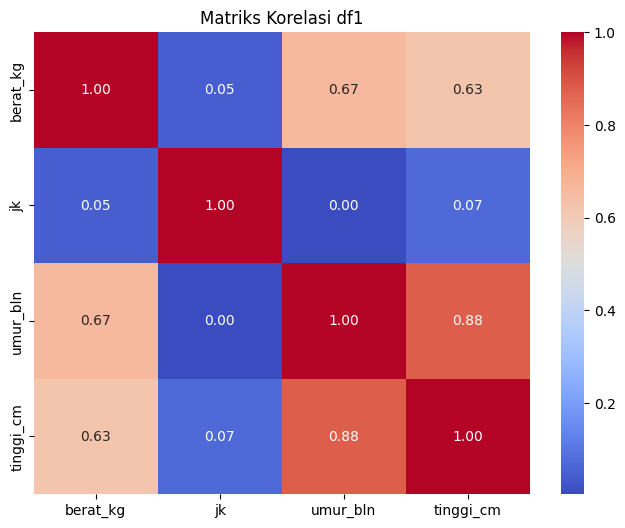

In [98]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriks Korelasi df1")
plt.show

In [99]:
from sklearn.model_selection import train_test_split

# Misalkan target (Y) adalah berat badan, # Variabel dependen
y = df1["berat_kg"]

# Fitur (X) adalah umur dan tinggi, # Variabel independen
X = df1[["umur_bln", "tinggi_cm"]]

# Bagi data 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42  # random_state supaya hasil konsisten
)

## Cetak Pembagian Data
print("Jumlah data train :", len(X_train))
print("Jumlah data test  :", len(X_test))

## cek apakah sudah ada konstanta pada data training
X_train.head()

Jumlah data train : 80000
Jumlah data test  : 20000


,umur_bln,tinggi_cm
75220,2,51.9
48955,13,74.3
44966,17,86.7
13568,16,76.8
92727,20,78.5


In [100]:
import statsmodels.api as sm

X_train_const = sm.add_constant(X_train)
X_train_const.head()

,const,umur_bln,tinggi_cm
75220,1.0,2,51.9
48955,1.0,13,74.3
44966,1.0,17,86.7
13568,1.0,16,76.8
92727,1.0,20,78.5


In [101]:
import statsmodels.api as sm

# Buat model OLS
model = sm.OLS(y_train, X_train_const).fit()
print('-----------------------------')
print(model.params)
print('-----------------------------')

const = model.params['const']
x1_umur = model.params['umur_bln']
x2_tinggi = model.params['tinggi_cm']

# print persamaan regresi
print(f"y = {const:.3f} + {x1_umur:.3f}*x1 + {x2_tinggi:.3f}*x2")

-----------------------------
const        2.545617
umur_bln     0.229719
tinggi_cm    0.054192
dtype: float64
-----------------------------
y = 2.546 + 0.230*x1 + 0.054*x2


In [102]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               berat_kg   R-squared:                       0.450
Model:                            OLS   Adj. R-squared:                  0.450
Method:                 Least Squares   F-statistic:                 3.272e+04
Date:                Sun, 12 Oct 2025   Prob (F-statistic):               0.00
Time:                        07:10:14   Log-Likelihood:            -1.8505e+05
No. Observations:               80000   AIC:                         3.701e+05
Df Residuals:                   79997   BIC:                         3.701e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.5456      0.091     28.039      0.0

In [103]:
# Tambahkan konstanta ke data uji
X_test_const = sm.add_constant(X_test)

# Prediksi berat badan
y_pred_test = model.predict(X_test_const)

# Buat tabel hasil prediksi
hasil = pd.DataFrame({
    "Umur (bulan)": X_test["umur_bln"].to_numpy(),
    "Tinggi (cm)": X_test["tinggi_cm"].to_numpy(),
    "Berat Aktual (kg)": y_test.to_numpy(),
    "Berat Prediksi (kg)": y_pred_test
})

# 1) Selisih error (positif = overpredict)
hasil["Selisih error (kg)"] = hasil["Berat Prediksi (kg)"] - hasil["Berat Aktual (kg)"]

# 2) Akurasi per-baris (100 × (1 − |error| / aktual)), dibatasi 0–100
denom = hasil["Berat Aktual (kg)"].replace(0, np.nan)  # antisipasi pembagi nol
hasil["Akurasi (%)"] = (1 - (hasil["Selisih error (kg)"].abs() / denom)).clip(lower=0, upper=1) * 100

hasil

,Umur (bulan),Tinggi (cm),Berat Aktual (kg),Berat Prediksi (kg),Selisih error (kg),Akurasi (%)
75721,1,54.6,7.0,5.734226,-1.265774,81.917510
80184,8,66.0,12.2,7.960047,-4.239953,65.246290
19864,20,90.0,10.9,12.017284,1.117284,89.749692
76699,13,82.4,9.6,9.997392,0.397392,95.860500
92991,11,70.1,13.2,8.871391,-4.328609,67.207511
...,...,...,...,...,...,...
32595,9,67.3,11.8,8.260216,-3.539784,70.001830
29313,15,80.2,9.6,10.337607,0.737607,92.316595
37862,8,61.9,8.0,7.737860,-0.262140,96.723246
53421,12,74.9,5.4,9.361232,3.961232,26.643845


**TUGAS PRAKTIKUM MANDIRI**

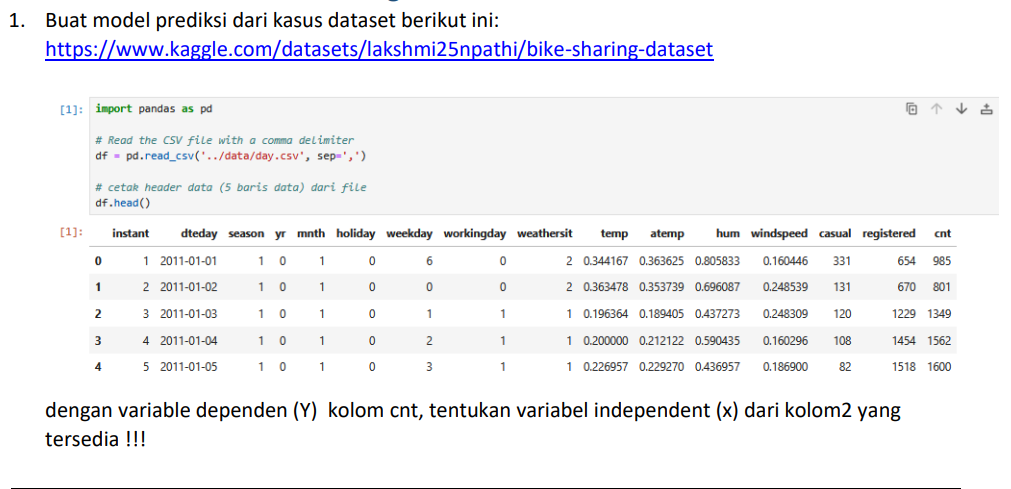

In [133]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np




In [136]:
# Baca dataset
df = pd.read_csv('/content/drive/MyDrive/praktikum_ml/praktikum03/data/day.csv')

df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [137]:
# Variabel dependen (Y)
y = df['cnt']

# Variabel independen (X)
X = df[['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
        'weathersit', 'temp', 'atemp', 'hum', 'windspeed']]


In [138]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [139]:
# Inisialisasi model
model = LinearRegression()

# Latih model
model.fit(X_train, y_train)

LinearRegression()

In [140]:
# Prediksi
y_pred = model.predict(X_test)

# Hitung skor R² dan RMSE
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("R² Score:", r2)
print("RMSE:", rmse)


R² Score: 0.8276670090367212
RMSE: 831.2851545662686


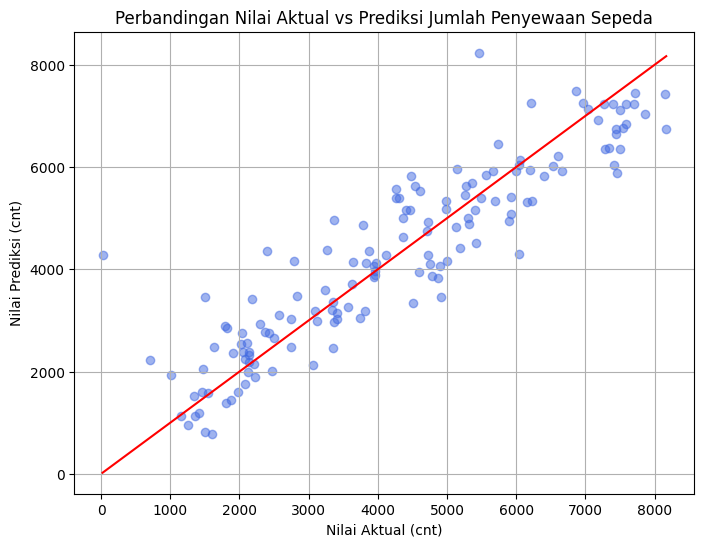

In [141]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5, color='royalblue')
plt.xlabel("Nilai Aktual (cnt)")
plt.ylabel("Nilai Prediksi (cnt)")
plt.title("Perbandingan Nilai Aktual vs Prediksi Jumlah Penyewaan Sepeda")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')
plt.grid(True)
plt.show()

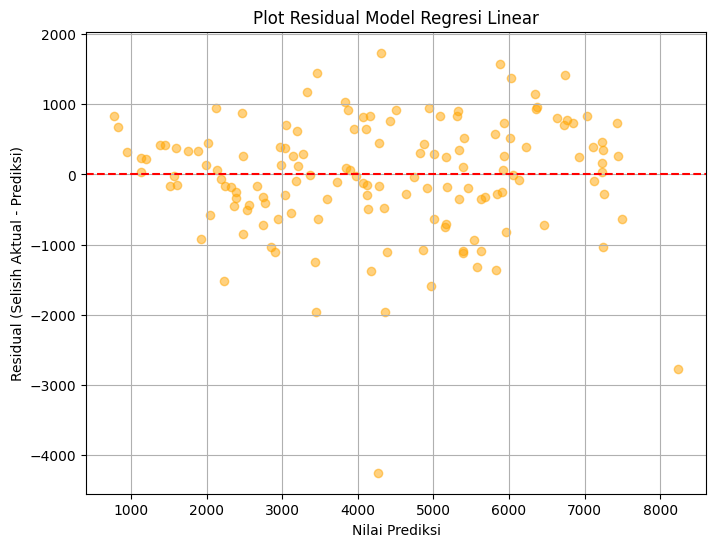

In [142]:
residuals = y_test - y_pred

plt.figure(figsize=(8,6))
plt.scatter(y_pred, residuals, alpha=0.5, color='orange')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Nilai Prediksi")
plt.ylabel("Residual (Selisih Aktual - Prediksi)")
plt.title("Plot Residual Model Regresi Linear")
plt.grid(True)
plt.show()


In [143]:
coef_df = pd.DataFrame({
    'Variabel': X.columns,
    'Koefisien': model.coef_
})
print(coef_df)

      Variabel    Koefisien
0       season   524.722536
1           yr  2023.997547
2         mnth   -38.444658
3      holiday  -391.550766
4      weekday    72.937003
5   workingday   160.804892
6   weathersit  -632.856284
7         temp  2097.247836
8        atemp  3488.042179
9          hum  -865.439419
10   windspeed -2080.540395
